In [5]:
import nbformat
import pandas as pd
import glob

In [2]:
def read_nb(nb_filename):
    """Read notebooks and return content."""
    with open(nb_filename, "rb") as nb_file:
        txt = nb_file.read()
    return nbformat.reads(txt, nbformat.NO_CONVERT)

In [ ]:
path = r'/Users/khalilza/Desktop/Evaluation_Solutions/P2/*/*'
notebooks1 = glob.glob(path + "/*.ipynb")
path = r'/Users/khalilza/Desktop/Evaluation_Solutions/ip2/*/*'
notebooks2 = glob.glob(path + "/*.ipynb")

notebooks = notebooks1+notebooks2
notebooks

In [35]:
len(notebooks),len(notebooks1),len(notebooks2)

(324, 208, 116)

In [78]:
# Go through all notebooks
print("Start checking Markdown comments")
word_count = []
cnt=0
for nb in notebooks:
    if 'rej' not in nb:
        # Load notebook
        nb_json = read_nb(nb)

        # Collect markdowns 
        MD = []
        for c in nb_json['cells']:
            if c['cell_type']=='markdown':
                MD.append(c['source'])
        word_count.append(pd.Series(MD).apply(lambda x: len(x.split())).sum())
        cnt+=1

Start checking Markdown comments


/var/folders/_g/8bvn35l91r74l4kv0hjkl4l00000gp/T/ipykernel_63347/1447504865.py:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  word_count.append(pd.Series(MD).apply(lambda x: len(x.split())).sum())


In [80]:
cnt

240

In [84]:
import matplotlib.pyplot as plt

In [92]:
wc = pd.DataFrame(word_count)

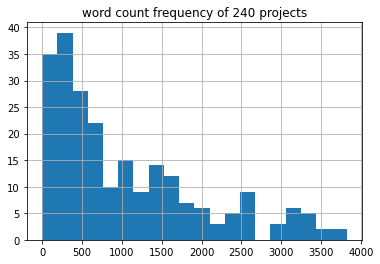

In [99]:
wc[wc<4000].hist(bins=20)
plt.title('word count frequency of 240 projects');